 Plotting histograms for numerical features:


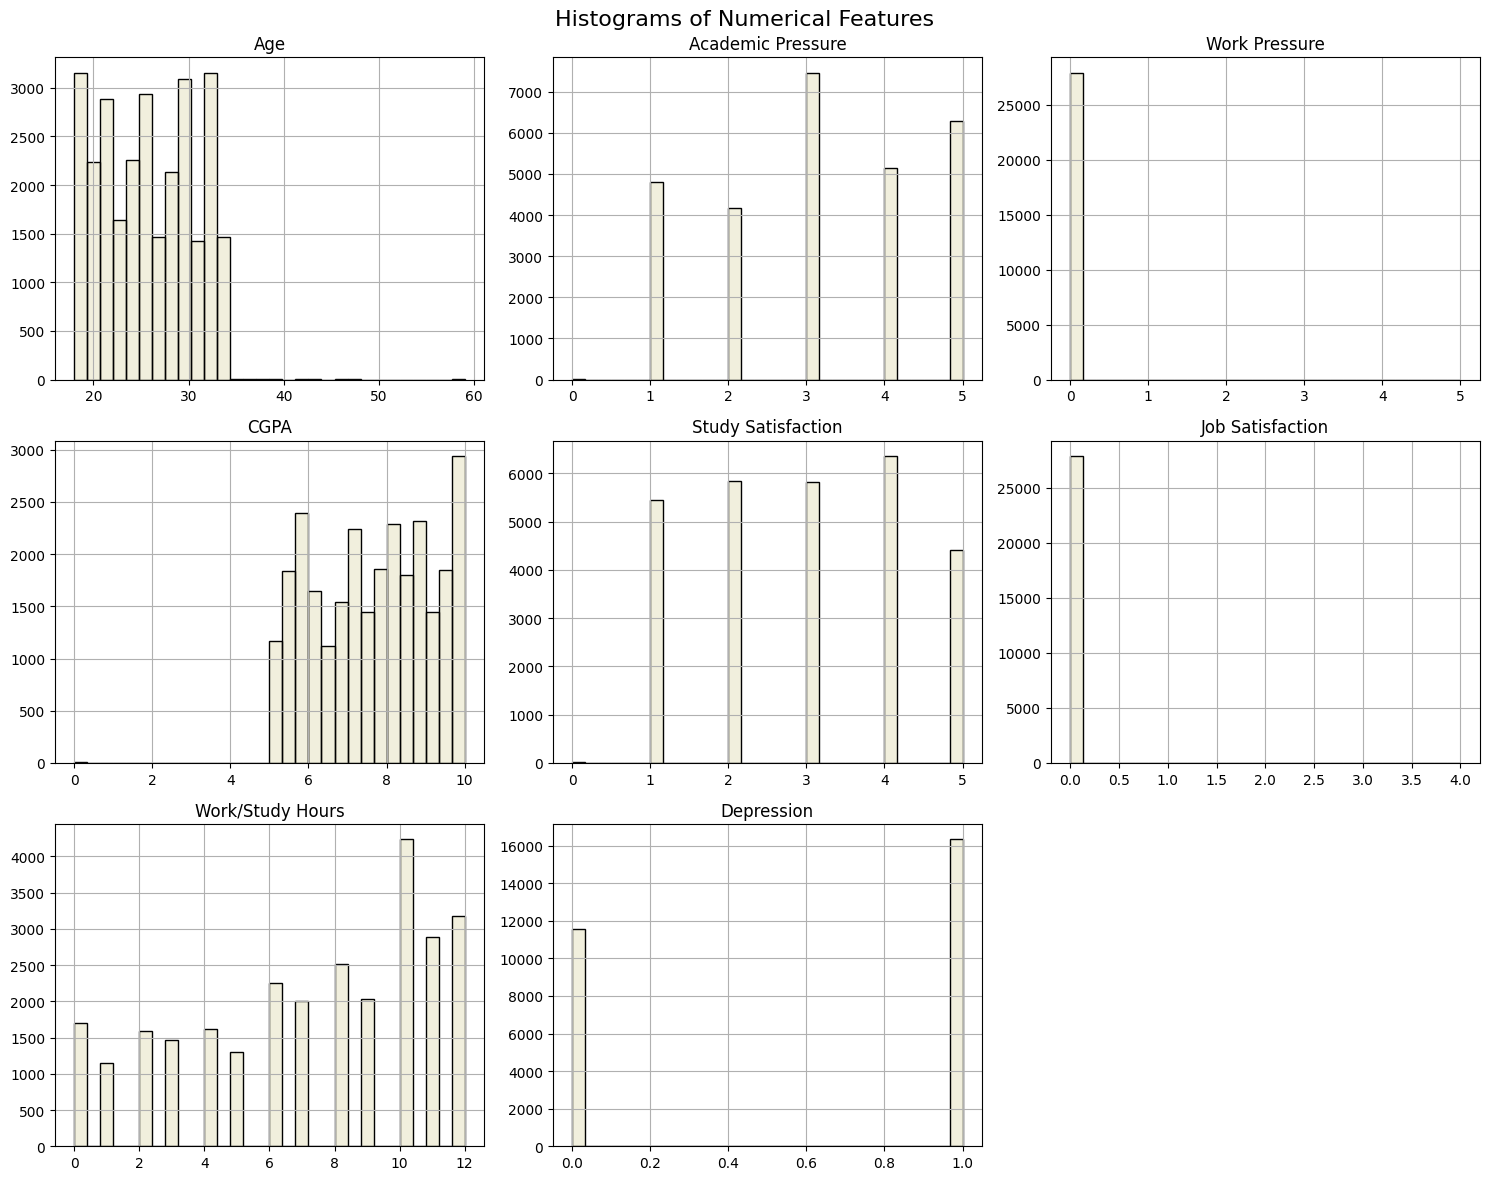

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# بارگذاری داده‌ها از فایل CSV
df = pd.read_csv("student_depression_dataset.csv")

# حذف ستون "id" که برای شناسایی یکتای دانشجویان است و به تجزیه و تحلیل نیازی ندارد
df = df.drop(columns=["id"])

# تعیین نوع ویژگی‌ها: عددی vs متنی
# ویژگی‌های عددی شامل ستون‌هایی هستند که نوع داده آنها int64 یا float64 است
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns  # ویژگی‌های عددی
# ویژگی‌های متنی (دسته‌ای) شامل ستون‌هایی هستند که نوع داده آنها object است
categorical_cols = df.select_dtypes(include=["object"]).columns  # ویژگی‌های دسته‌ای (متنی)

# رسم هیستوگرام برای ستون‌های عددی
# هیستوگرام‌ها برای ویژگی‌های عددی با استفاده از متد hist رسم می‌شوند. 
# برای هر ستون عددی یک هیستوگرام به تعداد bins معین نمایش داده می‌شود.
print("\033[94m Plotting histograms for numerical features:\033[0m")
random_color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(4)])
df[numeric_cols].hist(bins=30, figsize=(15, 12), color=random_color, edgecolor='black')

# افزودن عنوان به نمودار
plt.suptitle("Histograms of Numerical Features", fontsize=16)

# تنظیمات نمایش نمودار
plt.tight_layout()  # تنظیم چیدمان نمودار برای جلوگیری از هم‌پوشانی
plt.show()  # نمایش نمودار



 Plotting histograms for categorical features:


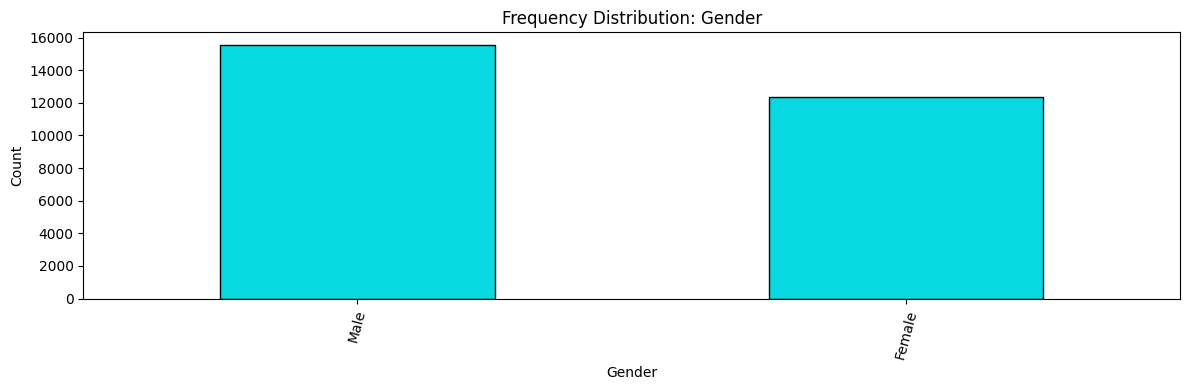

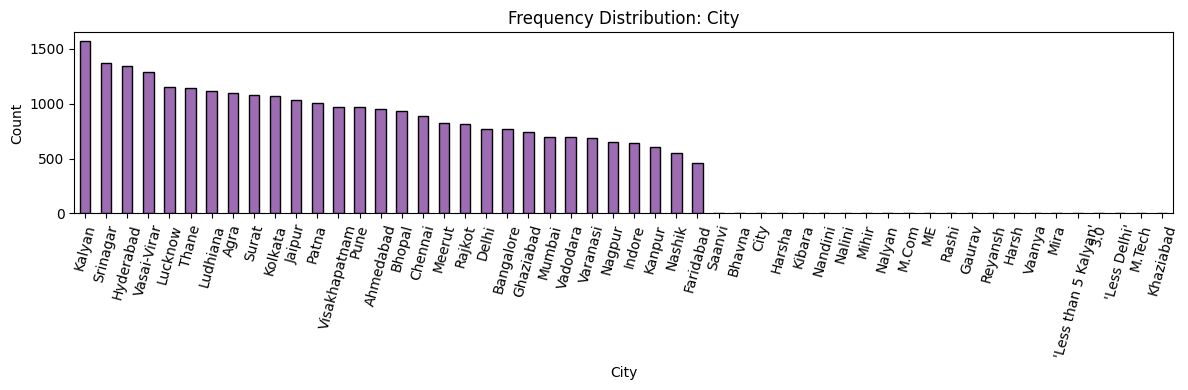

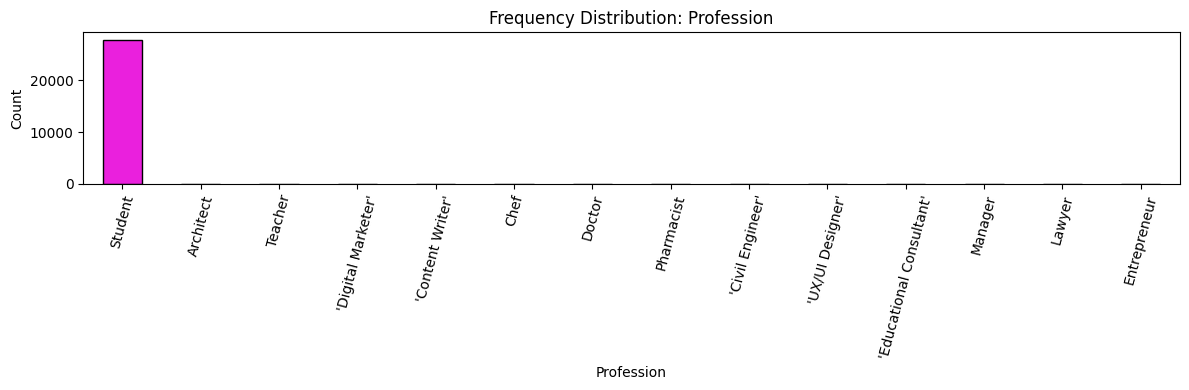

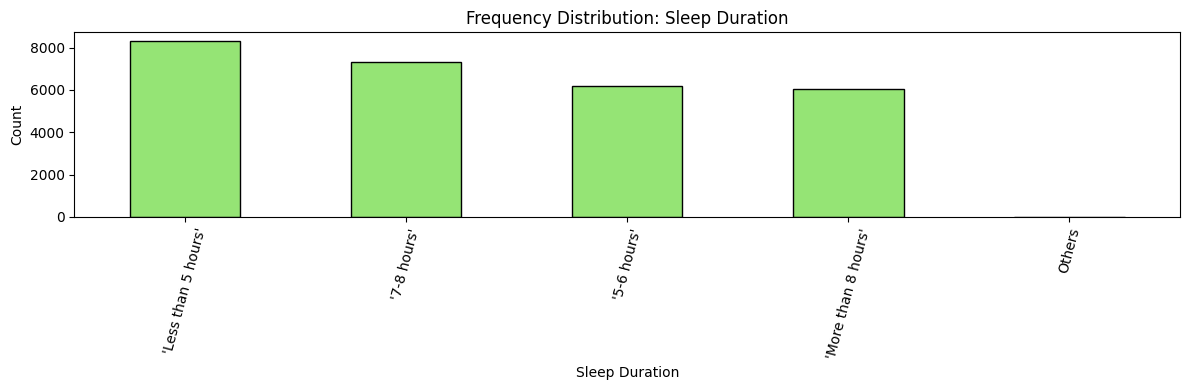

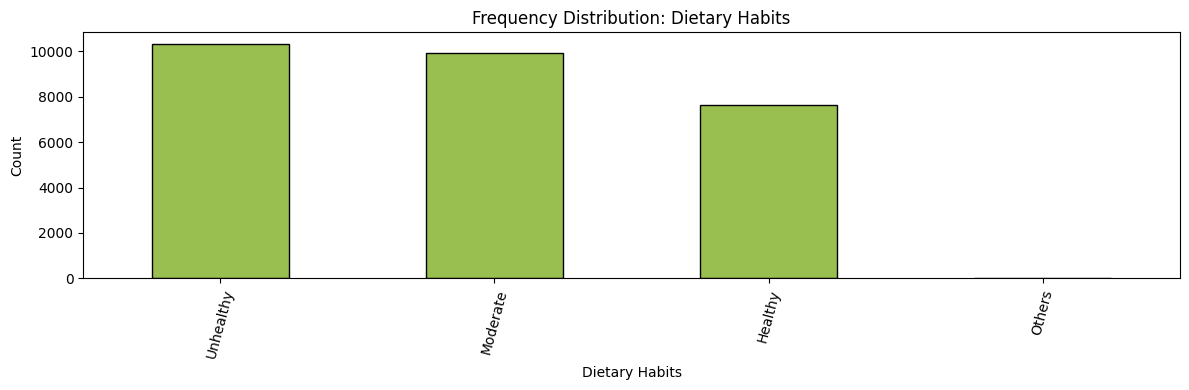

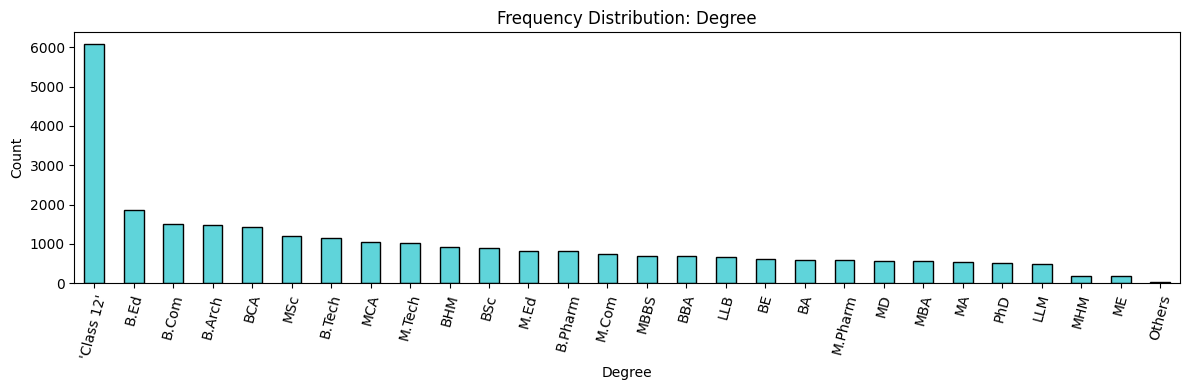

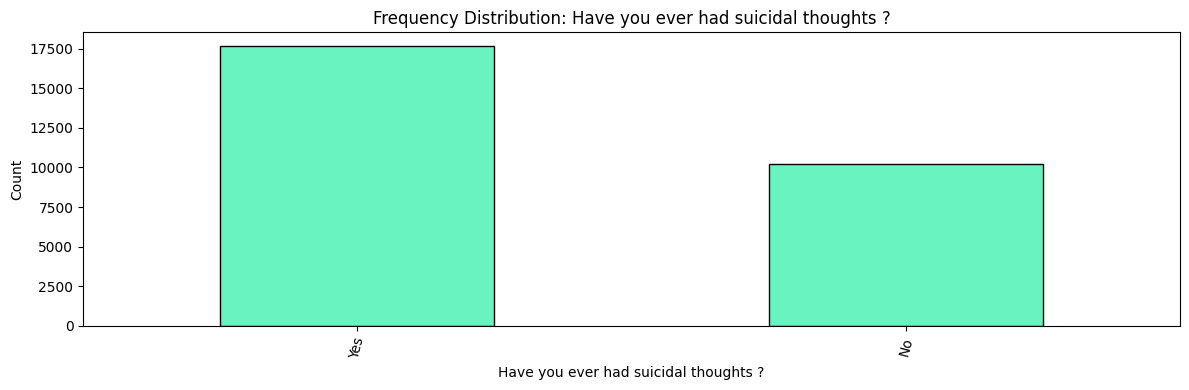

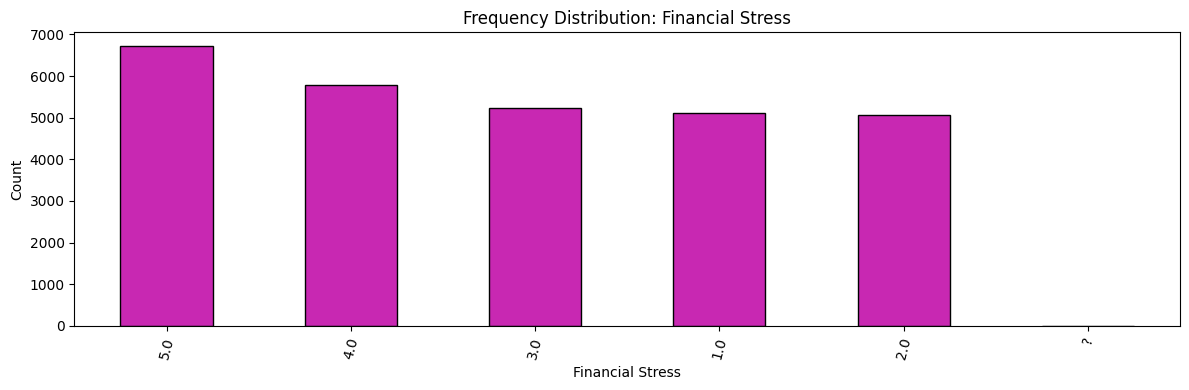

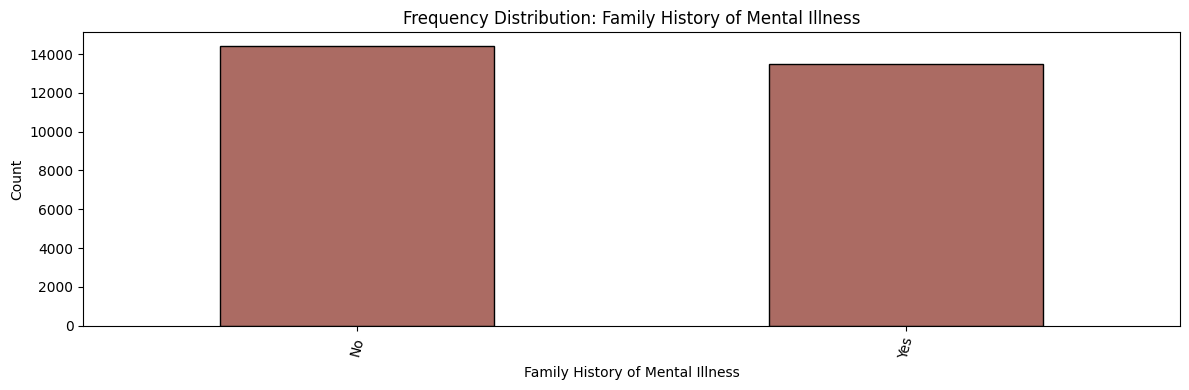

In [20]:
# رسم هیستوگرام برای ویژگی‌های متنی (categorical)
# در این بخش برای هر ویژگی دسته‌ای (متنی) یک نمودار میله‌ای رسم می‌شود که تعداد نمونه‌ها در هر دسته را نشان می‌دهد.
print("\n\033[94m Plotting histograms for categorical features:\033[0m")  # توضیح انگلیسی برای ویژگی‌های دسته‌ای

# پیمایش تمام ویژگی‌های دسته‌ای
for col in categorical_cols:
    # برای هر ویژگی دسته‌ای یک شکل جدید با اندازه معین ساخته می‌شود
    plt.figure(figsize=(12, 4))
    random_color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)])

    # رسم نمودار میله‌ای برای نمایش توزیع فراوانی مقادیر هر ویژگی دسته‌ای
    df[col].value_counts().plot(kind='bar', color=random_color, edgecolor='black')  # رسم نمودار میله‌ای برای ویژگی‌های دسته‌ای
    
    # عنوان نمودار که نام ویژگی دسته‌ای را نمایش می‌دهد
    plt.title(f"Frequency Distribution: {col}")  # عنوان انگلیسی برای هر ویژگی دسته‌ای
    
    # برچسب محور عمودی (تعداد داده‌ها)
    plt.ylabel("Count")  # برچسب محور عمودی به زبان انگلیسی
    
    # چرخاندن برچسب‌های محور X به اندازه 45 درجه برای جلوگیری از هم‌پوشانی
    plt.xticks(rotation=75)  # چرخاندن برچسب‌های محور X
    
    # تنظیم چیدمان برای جلوگیری از هم‌پوشانی نمودار
    plt.tight_layout()
    
    # نمایش نمودار
    plt.show()


ویژگی: Age
→ تعداد موارد پرت: 0
→ بازه نرمال: [7.50, 43.50]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Age]
Index: []



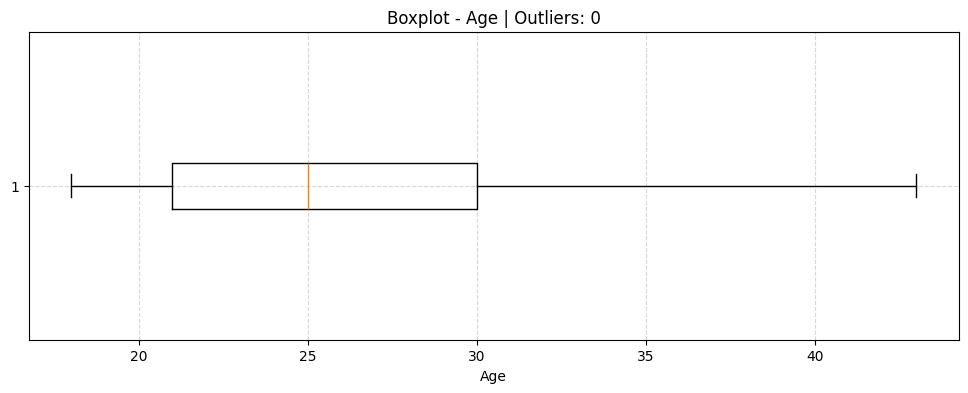

→ مقادیر پرت حذف شدند.

ویژگی: CGPA
→ تعداد موارد پرت: 0
→ بازه نرمال: [2.35, 12.87]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [CGPA]
Index: []



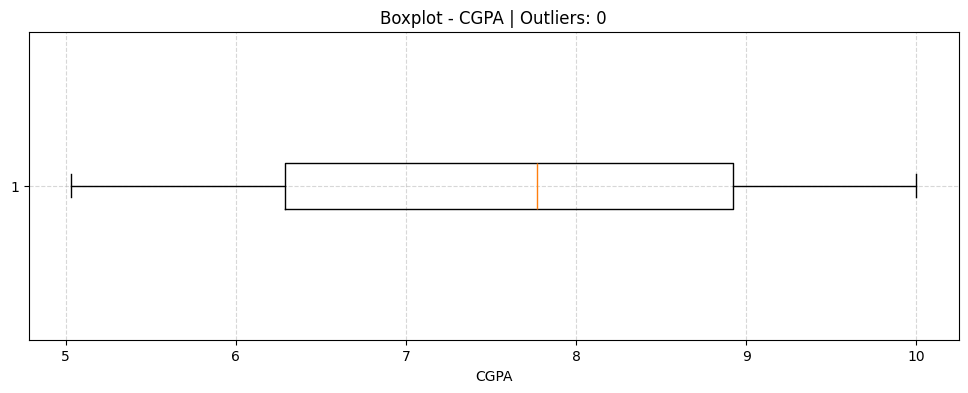

→ مقادیر پرت حذف شدند.

ویژگی: Work/Study Hours
→ تعداد موارد پرت: 0
→ بازه نرمال: [-5.00, 19.00]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Work/Study Hours]
Index: []



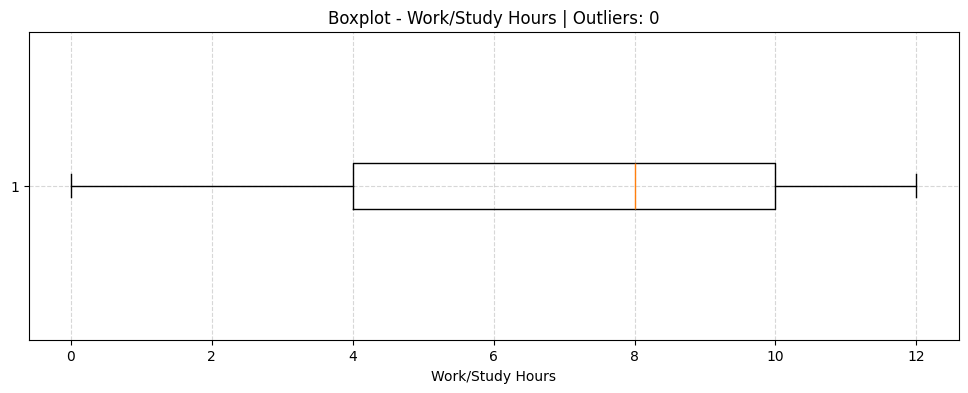

→ مقادیر پرت حذف شدند.

ویژگی: Academic Pressure
→ تعداد موارد پرت: 0
→ بازه نرمال: [-1.00, 7.00]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Academic Pressure]
Index: []



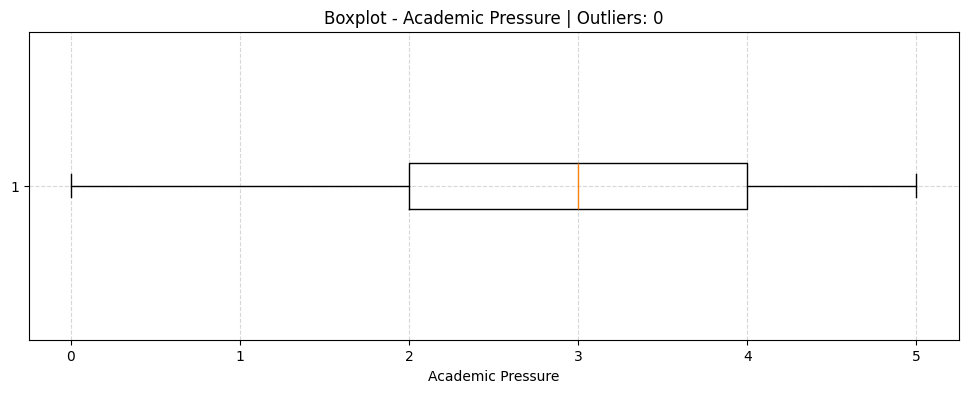

→ مقادیر پرت حذف شدند.

ویژگی: Study Satisfaction
→ تعداد موارد پرت: 0
→ بازه نرمال: [-1.00, 7.00]
→ نمونه‌ای از outlierها:
Empty DataFrame
Columns: [Study Satisfaction]
Index: []



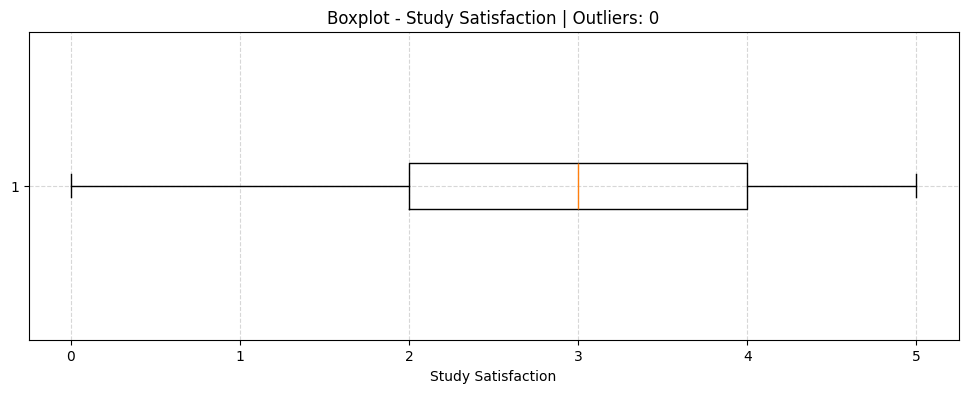

→ مقادیر پرت حذف شدند.



In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# تابع شناسایی outlierها بر اساس IQR
def detect_outliers_IQR(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower) | (data[feature] > upper)]
    return outliers, lower, upper

# تنظیمات: انتخاب نوع برخورد با outlierها
replace_with_median = False  # اگر True باشد، با میانه جایگزین می‌شوند، اگر False باشد حذف می‌شوند

# لیست ویژگی‌های عددی
features_to_check = ["Age", "CGPA", "Work/Study Hours", "Academic Pressure", "Study Satisfaction"]

# حلقه بررسی هر ویژگی
for feature in features_to_check:
    outliers, lower, upper = detect_outliers_IQR(df, feature)
    median_val = df[feature].median()

    print(f"\033[91mویژگی: {feature}\033[0m")
    print(f"→ تعداد موارد پرت: {len(outliers)}")
    print(f"→ بازه نرمال: [{lower:.2f}, {upper:.2f}]")
    print(f"→ نمونه‌ای از outlierها:\n{outliers[[feature]].head()}\n")

    # رسم نمودار boxplot با نمایش مقادیر پرت با رنگ قرمز
    plt.figure(figsize=(12, 4))
    plt.boxplot(df[feature], vert=False)
    
    # نمایش مقادیر پرت روی نمودار با رنگ قرمز
    for x in outliers[feature]:
        plt.plot(x, 1, 'ro', alpha=0.6)

    # نوشتن تعداد Outlierها روی نمودار
    plt.title(f"Boxplot - {feature} | Outliers: {len(outliers)}")
    plt.xlabel(feature)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

    # حذف یا جایگزینی مقادیر پرت
    if replace_with_median:
        df.loc[(df[feature] < lower) | (df[feature] > upper), feature] = median_val
        print("→ مقادیر پرت با میانه جایگزین شدند.\n")
    else:
        df = df[~((df[feature] < lower) | (df[feature] > upper))]
        print("→ مقادیر پرت حذف شدند.\n")
